# Influence of life satisfaction rates on movie genre distribution
## Introduction
Historically, in many mediums and art forms, the general life Circumstances of the population had a major impact on the nature of the creative work.
e.g. The dire circumstances of people led to the rise of romanticism in the art and music space.
This project aims to find out if the general life circumstances and happiness correlates to the releases of modern media, e.g. movies.
Maybe there is some trend to escapism in times of less happiness.

## Methods


### Datasources

<!-- Describe each datasources you plan to use in a section. Use the prefic "DatasourceX" where X is the id of the datasource. -->

#### Datasource1: General happiness in european countries
* Metadata URL: https://ec.europa.eu/eurostat/databrowser/view/ILC_PW01__custom_71016/bookmark/table?lang=de&bookmarkId=59450ed9-2039-47a5-80b7-b34a948aef30
* Data URL: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/ilc_pw01/?format=TSV&compressed=false
* Data Type: TSV

Official life satisfaction data from european countries by year.


#### Datasource2: OMDB (Open Media Database)

##### Datasource2.1: OMDB Movie Catalogue
* Metadata URL: https://www.omdb.org/en/us/content/Help:DataDownload
* Data URL: http://www.omdb.org/data/all_movies.csv.bz2
* Data Type: Zipped CSV
##### Datasource2.2: OMDB Movie Category Catalogue
* Metadata URL: https://www.omdb.org/en/us/content/Help:DataDownload
* Data URL: http://www.omdb.org/data/movie_categories.csv.bz2
* Data Type: Zipped CSV
##### Datasource2.3: OMDB Movie Category Names
* Metadata URL: https://www.omdb.org/en/us/content/Help:DataDownload
* Data URL: http://www.omdb.org/data/category_names.csv.bz2
* Data Type: Zipped CSV

## Results
### Python imports

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy as sal

In [159]:
def plot_movie_genres(genres):
    for i in range(len(genres)):
        SQLString = f"""
        SELECT COUNT(DISTINCT movies.name) as "amount of movies", CAST(STRFTIME('%Y',movies.date) AS INTEGER) AS year FROM movies
        JOIN movie_categories ON id = movie_id
        JOIN movie_category_names ON movie_categories.category_id = movie_category_names.category_id
        WHERE movie_category_names.name = "{genres[i]}" AND year>1950
        GROUP BY YEAR
        ORDER BY YEAR
        """
        df_genre = pd.read_sql(SQLString, engine, parse_dates=["movies.date"])
        df_genre = df_genre.dropna()
        x_genre = df_genre['year']
        y_genre = df_genre['amount of movies']
        movies[0].plot(x_genre, y_genre, label=f'{genres[i]}')


In [160]:
def plot_life_ladder():
    SQLString = f"""
    SELECT * FROM life_ladder
    """
    df_ladder = pd.read_sql(SQLString, engine)
    # df_ladder = df_ladder.loc(df_ladder["Country name"] == "Germany")
    movies[1].plot(df_ladder[''])
    print(df_ladder)

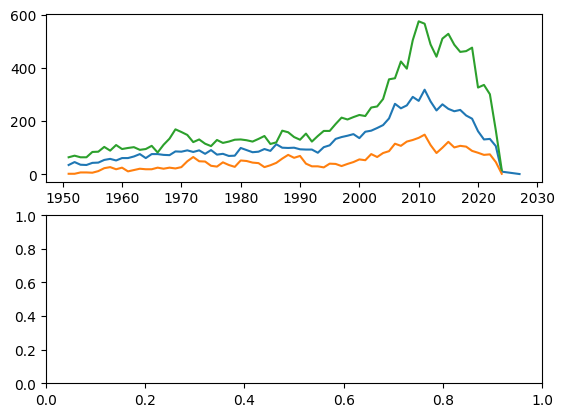

In [161]:
 engine = sal.create_engine('sqlite:///../data/projectdata.sqlite')
 fig, movies = plt.subplots(2)
 plot_movie_genres(['Comedy', 'Horror', 'Drama'])
 #plot_life_ladder()